In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pytry
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
n_iti = 3 #Number of experiment iterations/number of data files
#data3 = pd.DataFrame(pytry.read('theta15_batch'))
#data3

In [3]:
data = pd.DataFrame(pytry.read('theta15_batch'))
data = data.reset_index(drop=True)
list = [col for col in data if col.startswith('output')]
for i in list:
    data2=data[i].apply(pd.Series)
    data[i]=data2.iloc[:,-1]

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)
C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)


In [4]:
data

,classify_aim,classify_test,classify_train,len_train,n_dims,n_epoch,output_aim000000,output_aim000001,output_aim000002,output_aim000003,...,output_train039992,output_train039993,output_train039994,output_train039995,output_train039996,output_train039997,output_train039998,output_train039999,p_seed,seed
0,0.525,0.3020,0.853100,500,2,2,[-0.03678271],[-0.03330736],[-0.0249887],[-0.01869108],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,0.294,0.3885,0.804300,500,2,2,[0.03169563],[0.07251411],[0.11364551],[0.15823389],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,0.272,0.2420,0.879150,500,2,2,[0.43278471],[0.42334521],[0.38135521],[0.28116193],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
3,0.638,0.6940,0.865450,500,2,2,[0.4283354],[0.42936808],[0.43017685],[0.42647466],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
4,0.608,0.3175,0.906200,500,2,2,[-0.44300502],[-0.59044088],[-0.68997068],[-0.78119305],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4
5,0.565,0.2825,0.862500,500,2,2,[0.76798969],[0.74858831],[0.74973397],[0.74669559],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5
6,0.485,0.3675,0.894750,500,2,2,[0.17539283],[0.18753508],[0.10016202],[0.03899823],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
7,0.582,0.1605,0.831950,500,2,2,[0.10777846],[0.0818646],[0.08025842],[0.07971365],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7
8,0.362,0.2820,0.840200,500,2,2,[-0.60297085],[-0.60278706],[-0.61288204],[-0.62004856],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8
9,0.484,0.1810,0.833500,500,2,2,[0.86994844],[0.86404974],[0.86428517],[0.86284844],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,9


In [5]:
list = [col for col in data if col.startswith('output_train')]
print(len(list))
list = [col for col in data if col.startswith('output_test')]
print(len(list))
list = [col for col in data if col.startswith('output_aim')]
print(len(list))

40000
2000
1000


In [6]:
batches2 = pd.DataFrame(data[:20]) #20,000
batches3 = pd.DataFrame(data[20:40]) #30,000

Text(0.5,1,'1,500 seconds training')

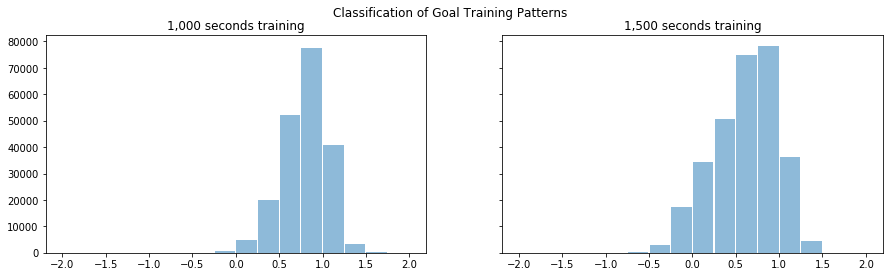

In [7]:
goal_training2 = pd.DataFrame({'goal_training': pd.concat([eval('batches2.output_train%06d' % i) for i in range(10000)])})
goal_training3 = pd.DataFrame({'goal_training': pd.concat([eval('batches3.output_train%06d' % i) for i in range(15000)])})
                           
goal_train2 = []
for i in range(len(goal_training2)):
    a = goal_training2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_train2.append(a)
goal_train2 = np.asarray(goal_train2)

goal_train3 = []
for i in range(len(goal_training3)):
    a = goal_training3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_train3.append(a)
goal_train3 = np.asarray(goal_train3)
                                

     
bins=np.arange(-2, 2 + 0.25, 0.25)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Training Patterns')
ax1.hist(goal_train2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(goal_train3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')

Text(0.5,1,'1,500 seconds training')

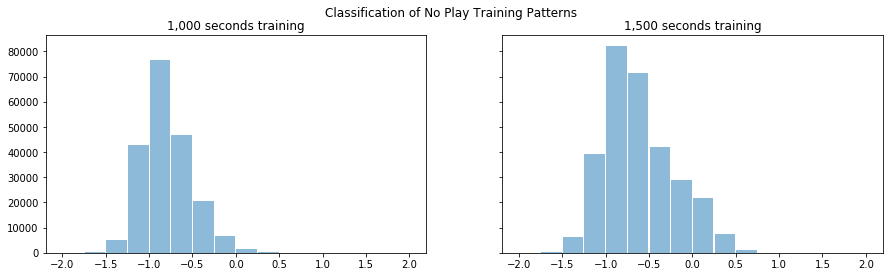

In [8]:
noplay_training2 = pd.DataFrame({'noplay_training': pd.concat([eval('batches2.output_train%06d' % i) for i in range(10000,20000)])})
noplay_training3 = pd.DataFrame({'noplay_training': pd.concat([eval('batches3.output_train%06d' % i) for i in range(15000,30000)])})
                           
noplay_train2 = []
for i in range(len(noplay_training2)):
    a = noplay_training2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_train2.append(a)
noplay_train2 = np.asarray(noplay_train2)

noplay_train3 = []
for i in range(len(noplay_training3)):
    a = noplay_training3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_train3.append(a)
noplay_train3 = np.asarray(noplay_train3)
                                

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Training Patterns')
ax1.hist(noplay_train2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(noplay_train3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')


Text(0.5,1,'1,500 seconds training')

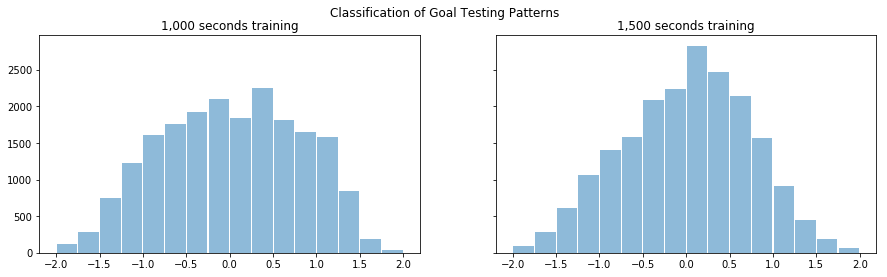

In [11]:
goal_testing2 = pd.DataFrame({'goal_testing': pd.concat([eval('batches2.output_test%06d' % i) for i in range(1000)])})
goal_testing3 = pd.DataFrame({'goal_testing': pd.concat([eval('batches3.output_test%06d' % i) for i in range(1000)])})

goal_test2 = []
for i in range(len(goal_testing2)):
    a = goal_testing2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_test2.append(a)
goal_test2 = np.asarray(goal_test2)
                                
goal_test3 = []
for i in range(len(goal_testing3)):
    a = goal_testing3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    goal_test3.append(a)
goal_test3 = np.asarray(goal_test3)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Goal Testing Patterns')
ax1.hist(goal_test2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(goal_test3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')

Text(0.5,1,'1,500 seconds training')

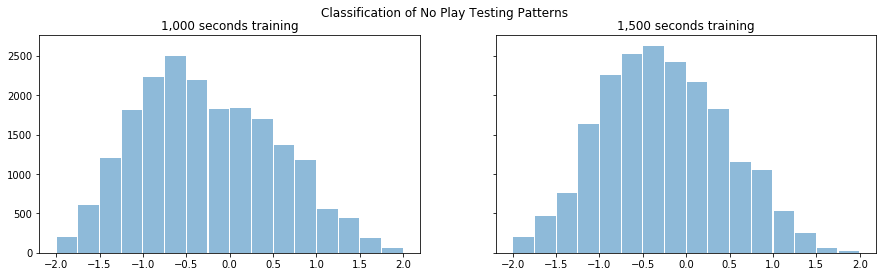

In [13]:
noplay_testing2 = pd.DataFrame({'noplay_testing': pd.concat([eval('batches2.output_test%06d' % i) for i in range(1000,2000)])})
noplay_testing3 = pd.DataFrame({'noplay_testing': pd.concat([eval('batches3.output_test%06d' % i) for i in range(1000,2000)])})

noplay_test2 = []
for i in range(len(noplay_testing2)):
    a = noplay_testing2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_test2.append(a)
noplay_test2 = np.asarray(noplay_test2)
                                
noplay_test3 = []
for i in range(len(noplay_testing3)):
    a = noplay_testing3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    noplay_test3.append(a)
noplay_test3 = np.asarray(noplay_test3)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of No Play Testing Patterns')
ax1.hist(noplay_test2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(noplay_test3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')


Text(0.5,1,'1,500 seconds training')

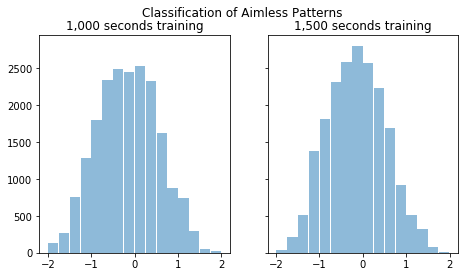

In [14]:
aimless2 = pd.DataFrame({'aimless_testing': pd.concat([eval('batches2.output_aim%06d' % i) for i in range (1000)])})
aimless3 = pd.DataFrame({'aimless_testing': pd.concat([eval('batches3.output_aim%06d' % i) for i in range (1000)])})

aim_test2 = []
for i in range(len(aimless2)):
    a = aimless2.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    aim_test2.append(a)
aim_test2 = np.asarray(aim_test2)

aim_test3 = []
for i in range(len(aimless3)):
    a = aimless3.iloc[i].values
    #b = np.concatenate(a).ravel().tolist()
    aim_test3.append(a)
aim_test3 = np.asarray(aim_test3)

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(aim_test2, bins=bins, rwidth=0.95, alpha=0.5, label='1,000 seconds training')
ax1.set_title('1,000 seconds training')
ax2.hist(aim_test3, bins=bins, rwidth=0.95, alpha=0.5, label='1,500 seconds training')
ax2.set_title('1,500 seconds training')

In [ ]:
x = range(10000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Training') #%d' % i) 
    plt.plot(x,goal_training[i::n_iti])

In [ ]:
x = range(10000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Noplay Training')# %d' % i) 
    plt.plot(x,noplay_training[i::n_iti])

In [ ]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Goal Test')# %d' % i) 
    plt.plot(x,goal_test[i::n_iti])

In [ ]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Nopay Test')# %d' % i) 
    plt.plot(x,noplay_test[i::n_iti])

In [ ]:
x = range(1000)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    plt.title('Aim Test')# %d' % i) 
    plt.plot(x,aim_test[i::n_iti])

# Report Average Output Every Second

In [ ]:
goal_training=goal_training.sort_index()
noplay_training=noplay_training.sort_index()

goaltrain_means = np.mean(goal_training.values.reshape(-1, 10), axis=1) #10000/1000=10 so ave every 10 values
noplaytrain_means = np.mean(noplay_training.values.reshape(-1, 10), axis=1) #10000/1000=10 so ave every 10 values

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Training Patterns')
ax1.hist(np.hstack(goaltrain_means), bins=bins, rwidth=0.95, alpha=0.5, label='goal training')
ax1.set_title('goal training')
ax2.hist(np.hstack(noplaytrain_means), bins=bins, rwidth=0.95, alpha=0.5, label='noplay training')
ax2.set_title('noplay training')

In [ ]:
goal_testing=goal_testing.sort_index()
noplay_testing=noplay_testing.sort_index()

goaltest_means = np.mean(goal_testing.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values
noplaytest_means = np.mean(noplay_testing.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values

f, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 4))
f.suptitle('Classification of Testing Patterns')
ax1.hist(np.hstack(goaltest_means), bins=bins, rwidth=0.95, alpha=0.5, label='goal testing')
ax1.set_title('goal testing')
ax2.hist(np.hstack(noplaytest_means), bins=bins, rwidth=0.95, alpha=0.5, label='noplay testing')
ax2.set_title('noplay testing')

In [ ]:
aimless=aimless.sort_index()

aimless_means = np.mean(aimless.values.reshape(-1, 10), axis=1) #1000/100=10 so ave every 10 values

f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(7.5, 4))
f.suptitle('Classification of Aimless Patterns')
ax1.hist(np.hstack(aimless_means), bins=bins, rwidth=0.95, alpha=0.5, label='aimless testing')
ax1.set_title('aimless testing')

In [ ]:
x = range(100)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    s=i*100
    e=s+100
    plt.title('Goal Test Means')# %d' % i) 
    plt.plot(x,goaltest_means[s:e:])

In [ ]:
x = range(100)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    s=i*100
    e=s+100
    plt.title('Noplay Test Means')# %d' % i) 
    plt.plot(x,noplaytest_means[s:e:])

In [ ]:
x = range(100)
plt.figure()
for i in range(n_iti):
    #plt.figure()
    s=i*100
    e=s+100
    plt.title('Aim Test Means')# %d' % i) 
    plt.plot(x,aimless_means[s:e:])